Dimensão original do treino: (426, 30)
Dimensão do treino aumentada com ruído: (852, 30)
------------------------------
Treinando e avaliando KNN com dados aumentados, variando K...
Avaliação concluída.


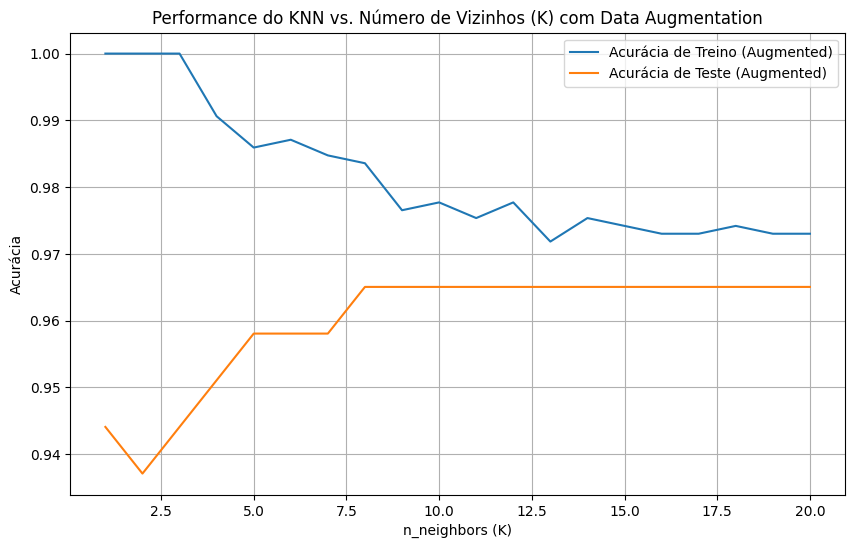


Com dados aumentados:
O melhor K encontrado foi: 8
A maior acurácia de teste observada foi: 0.9650
------------------------------
Treinando e avaliando KNN com dados ORIGINAIS (sem aumento), variando K...
Avaliação concluída.


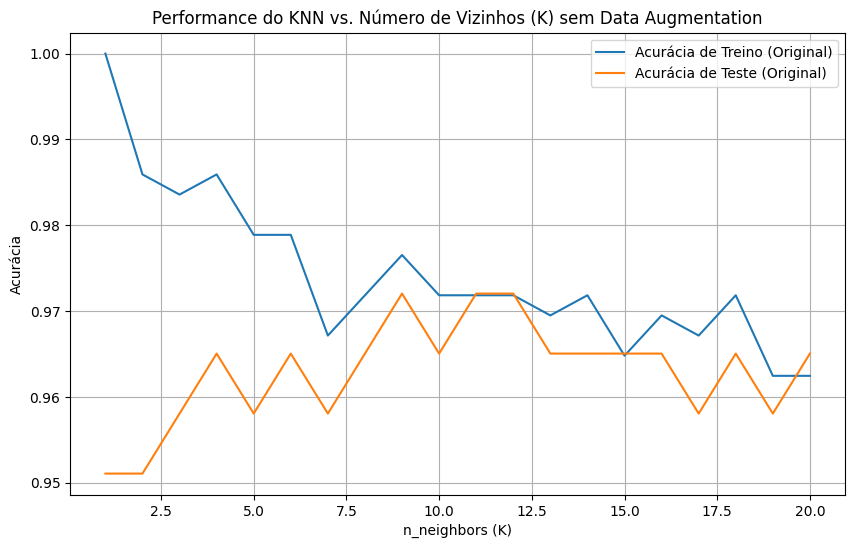

NameError: name 'original_test_accuracy' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Carregar o dataset Breast Cancer
# Conforme mencionado no contexto do TP2 [53]
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target # Separando features (X) e target (y)

# Dividir os dados em conjuntos de treino e teste
# Essencial para avaliar a generalização do modelo [16, 19, 22, 42]
# Usamos random_state para reprodutibilidade [8, 36]
# Test size 25% é um valor comum [36]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalonar os dados (Padronização)
# Importante para algoritmos baseados em distância como KNN [34, 35, 37, 40, 41]
# Ajustamos o scaler SOMENTE nos dados de treino para evitar 'ensinar para o teste' [Não explícito nas fontes, mas prática padrão em ML]
scaler = StandardScaler() # Instanciar o StandardScaler [14, 36, 54]
X_train_scaled = scaler.fit_transform(X_train) # Ajustar e transformar os dados de treino [36]
X_test_scaled = scaler.transform(X_test) # Transformar os dados de teste [36]

# 2. Geração e uso de dados sintéticos com ruído (Simulando aumento de base)

# Conforme a menção de aumentar o dataset com "Rui do Gauciano" no contexto do TP2 [44]
# Esta técnica é conhecida como Aumento de Dados (Data Augmentation) [49-52]
# Iremos adicionar ruído Gaussiano aos dados de treino para aumentar a base.

noise_factor = 0.1 # Fator para controlar a intensidade do ruído. Ajuste conforme necessário.
# Adiciona ruído gaussiano aos dados de treino escalonados
X_train_noisy = X_train_scaled + np.random.normal(0, noise_factor, X_train_scaled.shape) # Baseado na menção de ruído gaussiano [44] e prática comum em DA

# Combinar os dados de treino originais (escalonados) com os dados de treino com ruído
# Isso aumenta o conjunto de treino, simulando data augmentation [51]
X_train_augmented = np.concatenate((X_train_scaled, X_train_noisy))
y_train_augmented = np.concatenate((y_train, y_train)) # Duplica os rótulos para os dados com ruído

print(f"Dimensão original do treino: {X_train_scaled.shape}")
print(f"Dimensão do treino aumentada com ruído: {X_train_augmented.shape}")
print("-" * 30)

# 3. Treinamento e avaliação de modelos de classificação usando KNN
# 4. Análise da performance do modelo variando o parâmetro K

# Definir uma faixa de valores para K (n_neighbors) a serem testados
# Variar K é um hiperparâmetro importante para o KNN [12, 27, 34, 46, 48]
neighbors_settings = range(1, 21) # Testando K de 1 a 20 (similar a [12] que vai até 26)

# Listas para armazenar a acurácia de treino e teste para cada valor de K
training_accuracy_aug = []
test_accuracy_aug = []

print("Treinando e avaliando KNN com dados aumentados, variando K...")

# Iterar sobre os diferentes valores de K
for n_neighbors in neighbors_settings:
    # Construir o modelo KNN com o valor atual de K
    # O parâmetro n_neighbors é um hiperparâmetro do KNN [27, 46]
    knn = KNeighborsClassifier(n_neighbors=n_neighbors) # Instanciar o classificador [28, 31]

    # Treinar o modelo no conjunto de treino AUMENTADO
    # O método fit treina o modelo [13, 31, 55]
    knn.fit(X_train_augmented, y_train_augmented) # Usamos os dados aumentados aqui

    # Avaliar a acurácia no conjunto de treino (aumentado) e teste (original, sem ruído)
    # O método score retorna a acurácia para classificadores [33, 45]
    training_accuracy_aug.append(knn.score(X_train_augmented, y_train_augmented))

    # É crucial avaliar no conjunto de teste independente para estimar a generalização [22, 42]
    test_accuracy_aug.append(knn.score(X_test_scaled, y_test))

print("Avaliação concluída.")

# Plotar os resultados (acurácia vs. n_neighbors)
# Conforme demonstrado nas fontes para analisar a performance variando K [33, 56]
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy_aug, label="Acurácia de Treino (Augmented)") # Plotar acurácia de treino [33]
plt.plot(neighbors_settings, test_accuracy_aug, label="Acurácia de Teste (Augmented)") # Plotar acurácia de teste [33]
plt.ylabel("Acurácia") # Rótulo do eixo Y [33]
plt.xlabel("n_neighbors (K)") # Rótulo do eixo X [33]
plt.title("Performance do KNN vs. Número de Vizinhos (K) com Data Augmentation")
plt.legend() # Adicionar legenda [33]
plt.grid(True)
plt.show()

# O melhor resultado (maior acurácia de teste) geralmente indica o melhor valor de K
best_k_aug = neighbors_settings[np.argmax(test_accuracy_aug)]
best_test_accuracy_aug = np.max(test_accuracy_aug)

print(f"\nCom dados aumentados:")
print(f"O melhor K encontrado foi: {best_k_aug}")
print(f"A maior acurácia de teste observada foi: {best_test_accuracy_aug:.4f}")
print("-" * 30)

# --- Opcional: Comparação sem Aumento de Dados ---
# Para entender o impacto da técnica de Data Augmentation [51]

training_accuracy_orig = []
test_accuracy_orig = []

print("Treinando e avaliando KNN com dados ORIGINAIS (sem aumento), variando K...")

for n_neighbors in neighbors_settings:
    knn_original = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Fit nos dados de treino originais (escalonados) [31]
    knn_original.fit(X_train_scaled, y_train)
    # Avaliar no treino original e teste original
    training_accuracy_orig.append(knn_original.score(X_train_scaled, y_train))
    test_accuracy_orig.append(knn_original.score(X_test_scaled, y_test))

print("Avaliação concluída.")

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy_orig, label="Acurácia de Treino (Original)")
plt.plot(neighbors_settings, test_accuracy_orig, label="Acurácia de Teste (Original)")
plt.ylabel("Acurácia")
plt.xlabel("n_neighbors (K)")
plt.title("Performance do KNN vs. Número de Vizinhos (K) sem Data Augmentation")
plt.legend()
plt.grid(True)
plt.show()

best_k_orig = neighbors_settings[np.argmax(original_test_accuracy)]
best_test_accuracy_orig = np.max(original_test_accuracy)

print(f"\nSem dados aumentados:")
print(f"O melhor K encontrado foi: {best_k_orig}")
print(f"A maior acurácia de teste observada foi: {best_test_accuracy_orig:.4f}")
print("-" * 30)

# Análise final (comparando com e sem aumento de dados)
print("\nComparativo:")
print(f"Melhor acurácia de teste COM aumento de dados ({best_test_accuracy_aug:.4f})")
print(f"Melhor acurácia de teste SEM aumento de dados ({best_test_accuracy_orig:.4f})")
# Note que o impacto pode variar dependendo do dataset, do fator de ruído e da divisão treino/teste.


In [ ]:
 # Transformar os dados de teste [36]

# 2. Geração e uso de dados sintéticos com ruído (Simulando aumento de base)

# Conforme a menção de aumentar o dataset com "Rui do Gauciano" no contexto do TP2 [44]
# Esta técnica é conhecida como Aumento de Dados (Data Augmentation) [49-52]
# Iremos adicionar ruído Gaussiano aos dados de treino para aumentar a base.

noise_factor = 0.1 # Fator para controlar a intensidade do ruído. Ajuste conforme necessário.
# Adiciona ruído gaussiano aos dados de treino escalonados
X_train_noisy = X_train_scaled + np.random.normal(0, noise_factor, X_train_scaled.shape) # Baseado na menção de ruído gaussiano [44] e prática comum em DA

# Combinar os dados de treino originais (escalonados) com os dados de treino com ruído
# Isso aumenta o conjunto de treino, simulando data augmentation [51]
X_train_augmented = np.concatenate((X_train_scaled, X_train_noisy))
y_train_augmented = np.concatenate((y_train, y_train)) # Duplica os rótulos para os dados com ruído

print(f"Dimensão original do treino: {X_train_scaled.shape}")
print(f"Dimensão do treino aumentada com ruído: {X_train_augmented.shape}")
print("-" * 30)

# 3. Treinamento e avaliação de modelos de classificação usando KNN
# 4. Análise da performance do modelo variando o parâmetro K

# Definir uma faixa de valores para K (n_neighbors) a serem testados
# Variar K é um hiperparâmetro importante para o KNN [12, 27, 34, 46, 48]
neighbors_settings = range(1, 21) # Testando K de 1 a 20 (similar a [12] que vai até 26)

# Listas para armazenar a acurácia de treino e teste para cada valor de K
training_accuracy_aug = []
test_accuracy_aug = []

print("Treinando e avaliando KNN com dados aumentados, variando K...")

# Iterar sobre os diferentes valores de K
for n_neighbors in neighbors_settings:
    # Construir o modelo KNN com o valor atual de K
    # O parâmetro n_neighbors é um hiperparâmetro do KNN [27, 46]
    knn = KNeighborsClassifier(n_neighbors=n_neighbors) # Instanciar o classificador [28, 31]

    # Treinar o modelo no conjunto de treino AUMENTADO
    # O método fit treina o modelo [13, 31, 55]
    knn.fit(X_train_augmented, y_train_augmented) # Usamos os dados aumentados aqui

    # Avaliar a acurácia no conjunto de treino (aumentado) e teste (original, sem ruído)
    # O método score retorna a acurácia para classificadores [33, 45]
    training_accuracy_aug.append(knn.score(X_train_augmented, y_train_augmented))

    # É crucial avaliar no conjunto de teste independente para estimar a generalização [22, 42]
    test_accuracy_aug.append(knn.score(X_test_scaled, y_test))

print("Avaliação concluída.")

# Plotar os resultados (acurácia vs. n_neighbors)
# Conforme demonstrado nas fontes para analisar a performance variando K [33, 56]
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy_aug, label="Acurácia de Treino (Augmented)") # Plotar acurácia de treino [33]
plt.plot(neighbors_settings, test_accuracy_aug, label="Acurácia de Teste (Augmented)") # Plotar acurácia de teste [33]
plt.ylabel("Acurácia") # Rótulo do eixo Y [33]
plt.xlabel("n_neighbors (K)") # Rótulo do eixo X [33]
plt.title("Performance do KNN vs. Número de Vizinhos (K) com Data Augmentation")
plt.legend() # Adicionar legenda [33]
plt.grid(True)
plt.show()

# O melhor resultado (maior acurácia de teste) geralmente indica o melhor valor de K
best_k_aug = neighbors_settings[np.argmax(test_accuracy_aug)]
best_test_accuracy_aug = np.max(test_accuracy_aug)

print(f"\nCom dados aumentados:")
print(f"O melhor K encontrado foi: {best_k_aug}")
print(f"A maior acurácia de teste observada foi: {best_test_accuracy_aug:.4f}")
print("-" * 30)

# --- Opcional: Comparação sem Aumento de Dados ---
# Para entender o impacto da técnica de Data Augmentation [51]

training_accuracy_orig = []
test_accuracy_orig = []

print("Treinando e avaliando KNN com dados ORIGINAIS (sem aumento), variando K...")

for n_neighbors in neighbors_settings:
    knn_original = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Fit nos dados de treino originais (escalonados) [31]
    knn_original.fit(X_train_scaled, y_train)
    # Avaliar no treino original e teste original
    training_accuracy_orig.append(knn_original.score(X_train_scaled, y_train))
    test_accuracy_orig.append(knn_original.score(X_test_scaled, y_test))

print("Avaliação concluída.")

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy_orig, label="Acurácia de Treino (Original)")
plt.plot(neighbors_settings, test_accuracy_orig, label="Acurácia de Teste (Original)")
plt.ylabel("Acurácia")
plt.xlabel("n_neighbors (K)")
plt.title("Performance do KNN vs. Número de Vizinhos (K) sem Data Augmentation")
plt.legend()
plt.grid(True)
plt.show()

best_k_orig = neighbors_settings[np.argmax(original_test_accuracy)]
best_test_accuracy_orig = np.max(original_test_accuracy)

print(f"\nSem dados aumentados:")
print(f"O melhor K encontrado foi: {best_k_orig}")
print(f"A maior acurácia de teste observada foi: {best_test_accuracy_orig:.4f}")
print("-" * 30)

# Análise final (comparando com e sem aumento de dados)
print("\nComparativo:")
print(f"Melhor acurácia de teste COM aumento de dados ({best_test_accuracy_aug:.4f})")
print(f"Melhor acurácia de teste SEM aumento de dados ({best_test_accuracy_orig:.4f})")
# Note que o impacto pode variar dependendo do dataset, do fator de ruído e da divisão treino/teste.
